In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


In [3]:
forest = pd.read_csv(r"C:\Users\SHIVA KUMAR\Desktop\Assigmnt\Neural Network\forestfires.csv")

In [4]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
forest[forest.duplicated()].values

array([['aug', 'wed', 92.1, 111.2, 654.1, 9.6, 20.4, 42, 4.9, 0.0, 0.0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'small'],
       ['aug', 'sun', 91.4, 142.4, 601.4, 10.6, 19.8, 39, 5.4, 0.0, 0.0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'small'],
       ['mar', 'sat', 91.7, 35.8, 80.8, 7.8, 17.0, 27, 4.9, 0.0, 28.66,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 'large'],
       ['jun', 'fri', 91.1, 94.1, 232.1, 7.1, 19.2, 38, 4.5, 0.0, 0.0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 'small'],
       ['aug', 'thu', 91.6, 248.4, 753.8, 6.3, 20.4, 56, 2.2, 0.0, 0.0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'small'],
       ['aug', 'sat', 93.7, 231.1, 715.1, 8.4, 18.9, 64, 4.9, 0.0, 0.0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'small'],
       ['aug', 'tue', 96.1, 181.1, 671.2, 14.3, 21.6, 65, 4.9, 0.8, 0.0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0

In [8]:
forest[forest.duplicated()].shape


(8, 31)

In [9]:
df = forest.drop_duplicates()

In [10]:
df[df.duplicated()].shape


(0, 31)

In [11]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_10000\3537833935.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep')])

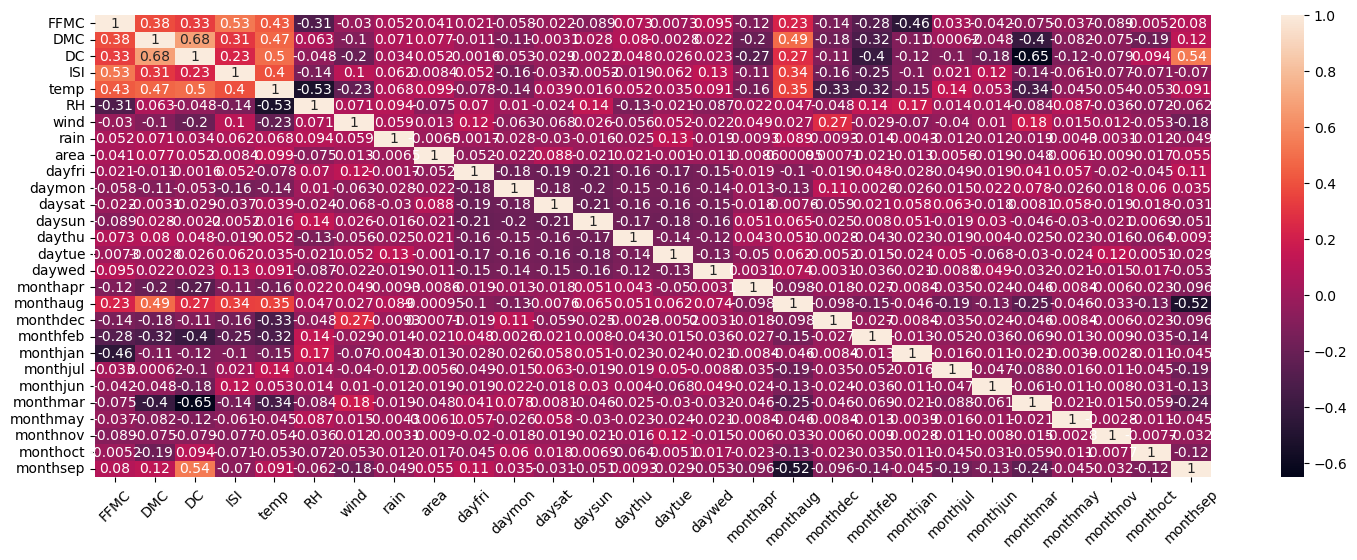

In [13]:
#Heatmap(test)
fig= plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)

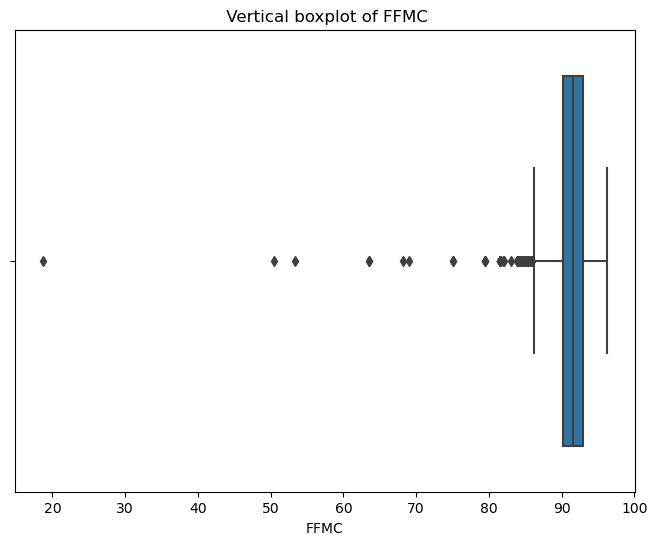

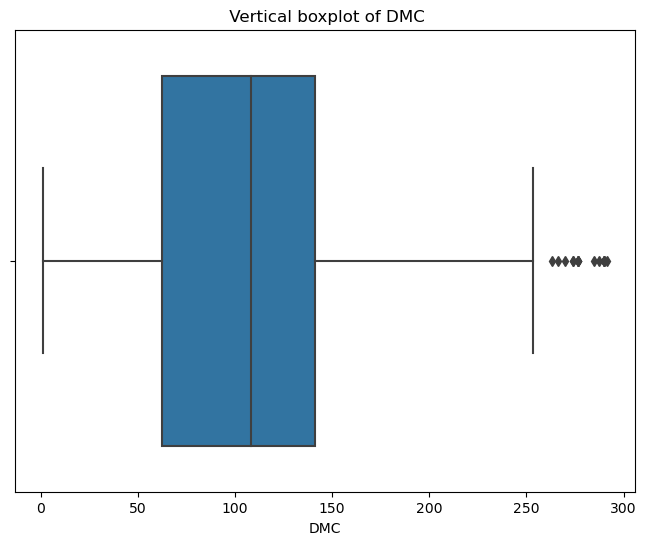

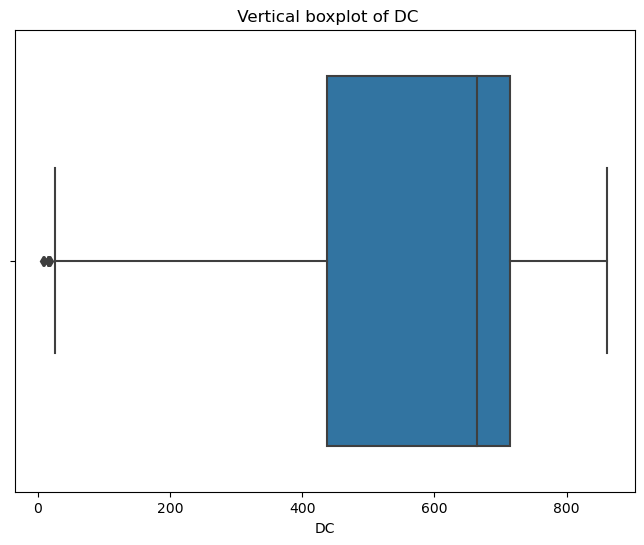

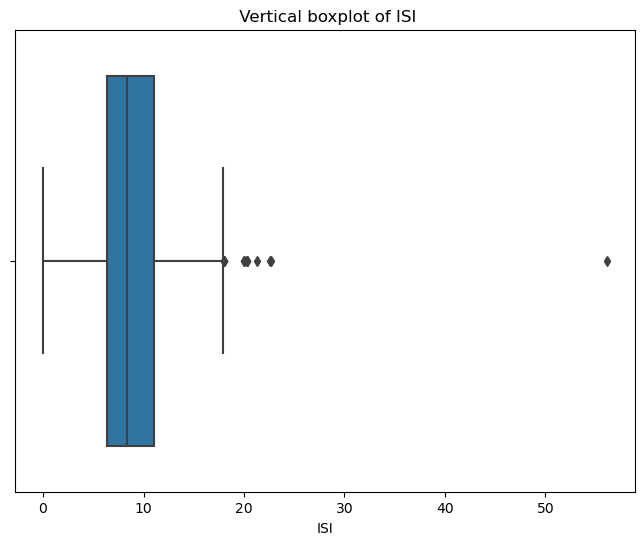

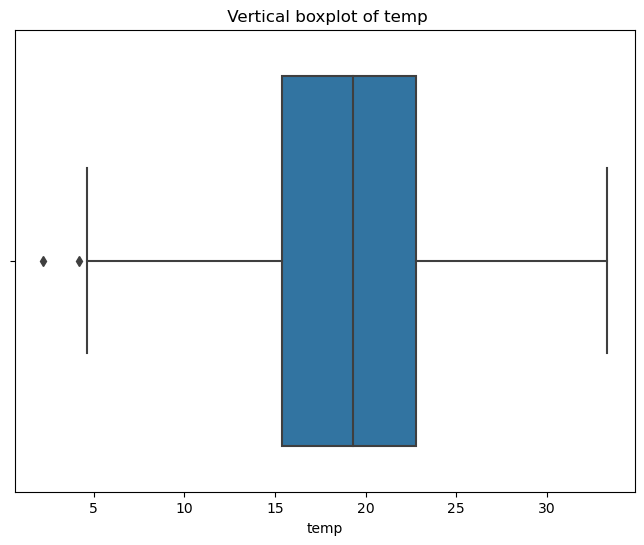

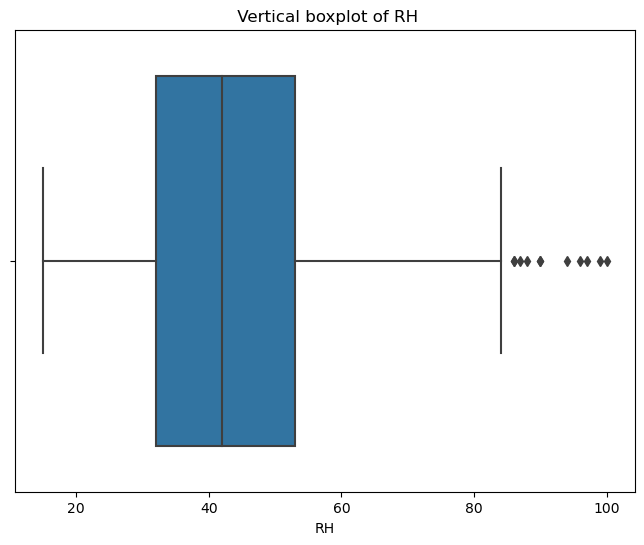

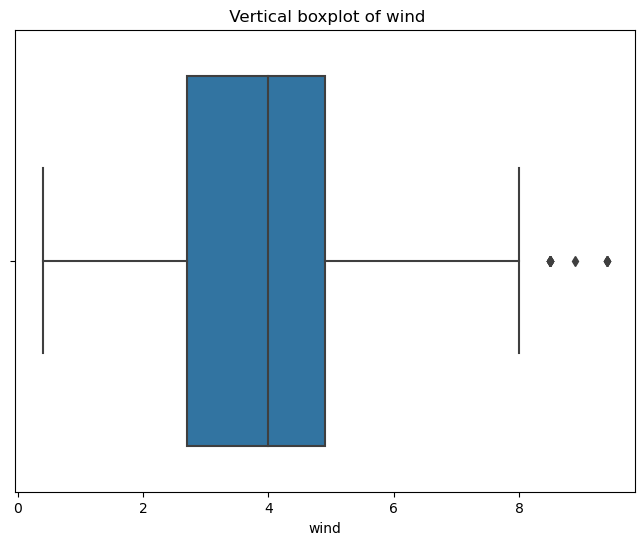

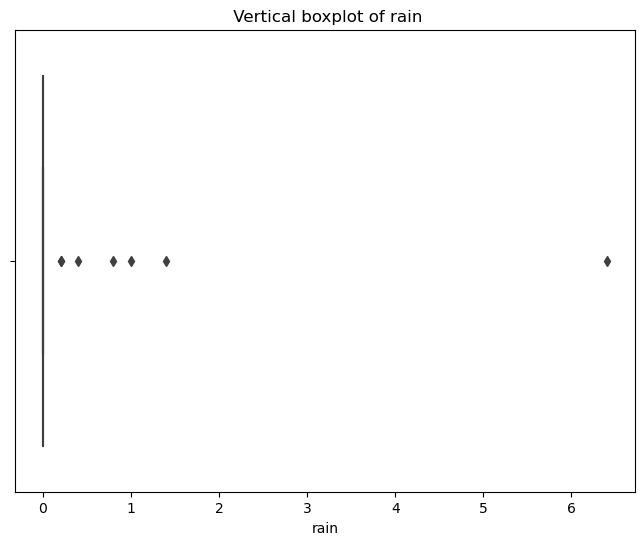

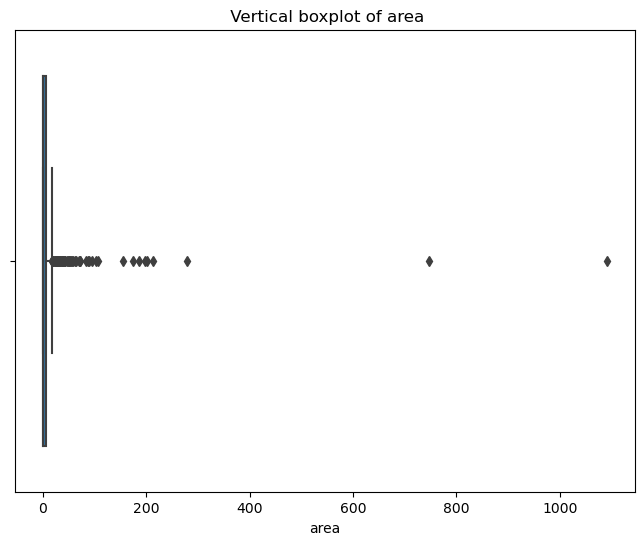

In [14]:
#BoXplots
import seaborn as sns
import matplotlib.pyplot as plt
data1 = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area']
for i in data1:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[i])
    plt.title(f" Vertical boxplot of {i}")
    plt.show

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout


df_cont = df.iloc[:,[2,3,4,5,6,7,8]]
df_cont

,FFMC,DMC,DC,ISI,temp,RH,wind
0,86.2,26.2,94.3,5.1,8.2,51,6.7
1,90.6,35.4,669.1,6.7,18.0,33,0.9
2,90.6,43.7,686.9,6.7,14.6,33,1.3
3,91.7,33.3,77.5,9.0,8.3,97,4.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8
...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7
513,81.6,56.7,665.6,1.9,21.9,71,5.8
514,81.6,56.7,665.6,1.9,21.2,70,6.7
515,94.4,146.0,614.7,11.3,25.6,42,4.0


In [16]:
df_cont.info()
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X1 = SS.fit_transform(df_cont)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FFMC    509 non-null    float64
 1   DMC     509 non-null    float64
 2   DC      509 non-null    float64
 3   ISI     509 non-null    float64
 4   temp    509 non-null    float64
 5   RH      509 non-null    int64  
 6   wind    509 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.8 KB


In [17]:
X1= pd.DataFrame(X1)
X1.columns=list(df_cont)
X1


,FFMC,DMC,DC,ISI,temp,RH,wind
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129
...,...,...,...,...,...,...,...
504,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894
505,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136
506,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370
507,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333


In [18]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
df['month'] = label_encoder.fit_transform(df['month'])
df['day'] = label_encoder.fit_transform(df['day'])
df['size_category'] = label_encoder.fit_transform(df['size_category'])


C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_10000\2581909789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = label_encoder.fit_transform(df['month'])
C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_10000\2581909789.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = label_encoder.fit_transform(df['day'])
C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_10000\2581909789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [19]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
X = df.iloc[:,:30]
y = df["size_category"]
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((407, 30), (102, 30))

In [22]:
len(df)

509

In [32]:
#creating model
from tensorflow.keras.models import Sequential

model = Sequential()

In [34]:
from tensorflow.keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(32, input_shape=(30,), activation='relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
from keras.models import Sequential




In [35]:
#compile model

model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])


In [26]:
#fit the model
h = model.fit(X_train,y_train, validation_split = 0.2, epochs=32, batch_size = 32)


Epoch 1/32


11/11 [==============================] - 1s 24ms/step - loss: 10.4350 - accuracy: 0.2738 - val_loss: 4.1023 - val_accuracy: 0.2561
Epoch 2/32
11/11 [==============================] - 0s 6ms/step - loss: 1.6599 - accuracy: 0.4954 - val_loss: 1.3615 - val_accuracy: 0.6829
Epoch 3/32
11/11 [==============================] - 0s 5ms/step - loss: 1.5981 - accuracy: 0.6615 - val_loss: 1.0103 - val_accuracy: 0.7195
Epoch 4/32
11/11 [==============================] - 0s 6ms/step - loss: 0.8345 - accuracy: 0.6831 - val_loss: 0.7209 - val_accuracy: 0.5000
Epoch 5/32
11/11 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.5569 - val_loss: 0.5350 - val_accuracy: 0.7927
Epoch 6/32
11/11 [==============================] - 0s 6ms/step - loss: 0.5952 - accuracy: 0.7385 - val_loss: 0.5049 - val_accuracy: 0.8171
Epoch 7/32
11/11 [==============================] - 0s 6ms/step - loss: 0.5431 - accuracy: 0.7508 - val_loss: 0.4987 - val_accuracy: 0.8171
Epoch 8/32
11/11

In [27]:
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
scores = model.evaluate(X_train, y_train)
metric_names = model.metrics_names

for i in range(len(metric_names)):
    print(f'{metric_names[i]}: {scores[i]*100:.2f}%')


13/13 [==============================] - 0s 1ms/step - loss: 0.2563 - accuracy: 0.9091
loss: 25.63%
accuracy: 90.91%


In [29]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])